In [1]:
import grib2io
import numpy as np
import xarray as xr
from datetime import timedelta
from mpl_toolkits.basemap import Basemap
from pyproj import Proj
from metpy.units import units
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

## grib2io

In [5]:
adam_dat_dir = '/scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/'
g = grib2io.open(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50')

In [123]:
g['TMP'][0]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

Printing g gives a high level overview of the messages included in the file. Variables are parameter short names.
Levels are the region of atmosphere, quantified by height, pressure, or cloud conditions, each variable is associated with

In [99]:
print(g)

mode = rb
name = /scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/gep06.t12z.pgrb2ab.0p50
messages = 38304
current_message = 0
size = 7284523833
closed = False
variables = ('4LFTX', '5WAVH', 'ABSV', 'ACPCP', 'ALBDO', 'APCP', 'APTMP', 'BRTMP', 'CAPE', 'CDUVB', 'CFRZR', 'CICEP', 'CIN', 'CLMR', 'CNWAT', 'CPOFP', 'CPRAT', 'CRAIN', 'CSNOW', 'CWAT', 'CWORK', 'DLWRF', 'DPT', 'DSWRF', 'DUVB', 'FLDCP', 'FRICV', 'GFLUX', 'GUST', 'HGT', 'HINDEX', 'HLCY', 'HPBL', 'ICAHT', 'ICEC', 'ICETK', 'ICIP', 'ICSEV', 'LAND', 'LFT X', 'LHTFL', 'MNTSF', 'MSLET', 'NCPCP', 'O3MR', 'PEVPR', 'PLI', 'PLPL', 'POT', 'PRATE', 'PRES', 'PRMSL', 'PVORT', 'PWAT', 'RH', 'SFCR', 'SHTFL', 'SNOD', 'SNOHF', 'SNOWC', 'SOILL', 'SOILW', 'SPFH', 'SUNSD', 'TCDC', 'TMAX', 'TMIN', 'TMP', 'TOZNE', 'TSOIL', 'U-GWD', 'UFLX', 'UGRD', 'ULWRF', 'USTM', 'USWRF', 'V-GWD', 'VFLX', 'VGRD', 'VIS', 'VRATE', 'VSTM', 'VVEL', 'VWSH', 'WATR', 'WEASD', 'WILT')
levels = ('0-0.1 m underground', '0.1-0.4 m underground', '0.33-1 sigma l

In [15]:
messages_with_temp = g['TMP'] #get messages dealing with temperature == TMP
messages_with_temp[0]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

In [28]:
g.levels_by_var('TMP')

['0.995 sigma level',
 '1 hybrid level',
 '1 mb',
 '10 mb',
 '100 m above ground',
 '100 mb',
 '1000 mb',
 '120-90 mb above ground',
 '150 mb',
 '150-120 mb above ground',
 '180-150 mb above ground',
 '1829 m above mean sea level',
 '2 hybrid level',
 '2 m above ground',
 '2 mb',
 '20 mb',
 '200 mb',
 '250 mb',
 '2743 m above mean sea level',
 '3 hybrid level',
 '3 mb',
 '30 mb',
 '30-0 mb above ground',
 '300 mb',
 '305 m above mean sea level',
 '320 K isentropic level',
 '350 mb',
 '3658 m above mean sea level',
 '4 hybrid level',
 '400 mb',
 '450 K isentropic level',
 '450 mb',
 '457 m above mean sea level',
 '4572 m above mean sea level',
 '5 mb',
 '50 mb',
 '500 mb',
 '550 K isentropic level',
 '550 mb',
 '60-30 mb above ground',
 '600 mb',
 '610 m above mean sea level',
 '650 K isentropic level',
 '650 mb',
 '7 mb',
 '70 mb',
 '700 mb',
 '750 mb',
 '80 m above ground',
 '800 mb',
 '850 mb',
 '90-60 mb above ground',
 '900 mb',
 '914 m above mean sea level',
 '925 mb',
 '950 mb',


In [16]:
#let's get the surface temperatures
msgs = g.select(shortName='TMP', level='2 m above ground')

In [17]:
#let's plot

lats, lons = msgs[0].grid()
m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')
#basemap just makes a projection plot upon which we can lay our data since it's gridded
xx, yy = m(lons, lats) #note to self, x=lons y=lats

In [18]:
print(msgs[0].units)
data = msgs[0].data

K


The grib2 messages have units associated with the data, encoded in the "units" attribute. We can use metpy's units handling (which is just pint under the hood) to make unit-aware data arrays and to handle unit conversions.

In [19]:
from metpy.units import units
temp_data = data * units(msgs[0].units)

In [20]:
temp_data.to(units.fahrenheit)

Magnitude,[[-25.54505157470703 -25.54505157470703 -25.54505157470703 ... -25.54505157470703 -25.54505157470703 -25.54505157470703] [-25.49105453491211 -25.509071350097656 -25.509071350097656 ... -25.455074310302734 -25.473064422607422 -25.473064422607422] [-24.897050857543945 -24.93305778503418 -24.951047897338867 ... -24.86107063293457 -24.879060745239258 -24.897050857543945] ... [-24.86107063293457 -24.86107063293457 -24.86107063293457 ... -24.843053817749023 -24.843053817749023 -24.843053817749023] [-25.56307029724121 -25.56307029724121 -25.56307029724121 ... -25.54505157470703 -25.54505157470703 -25.56307029724121] [-25.8150691986084 -25.8150691986084 -25.8150691986084 ... -25.8150691986084 -25.8150691986084 -25.8150691986084]]
Units,degree_Fahrenheit


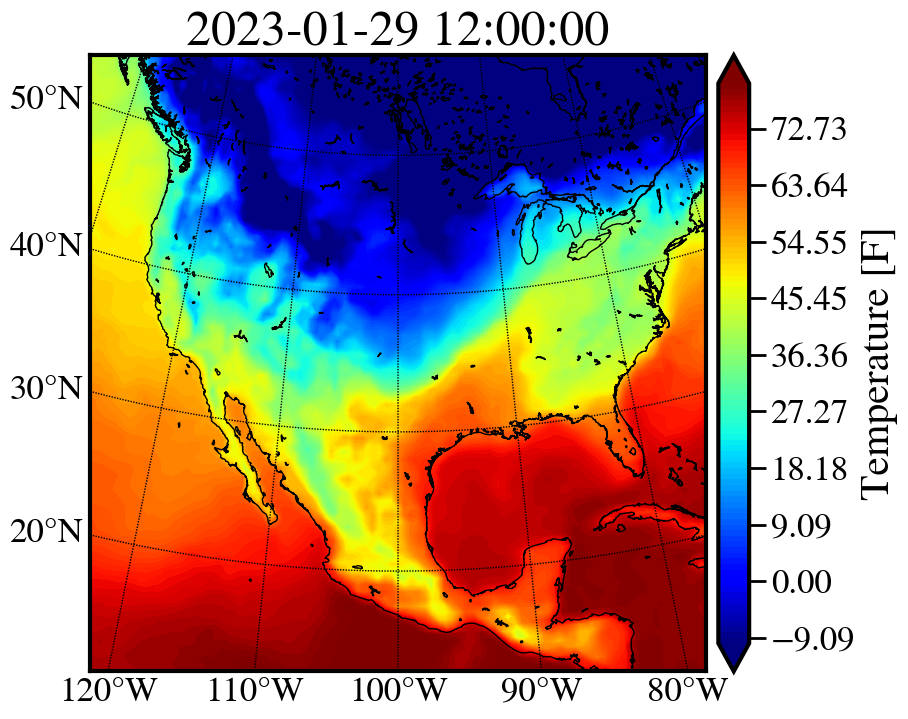

In [21]:
cs = m.contourf(xx,yy,temp_data.to(units.fahrenheit),levels=np.linspace(-10,80,100),cmap=plt.cm.jet,extend='both')
m.colorbar(location='right',label='Temperature [F]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(msgs[0].refDate
         )
plt.show()

## xarray

In [3]:
#we can do the same thing now with the xarray backend, powered by the grib2io engine

filters = dict(shortName='TMP', productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=103)

It is necessary to filter down the massive GRIB2 files. We can do this *before loading the file data* by selecting messages via their attributes. Most important is we can load only *1* type of product (e.g., forecast, ensemble, average, min/max) and surface definition; if the GRIB2 file contains messages of different product type only one template can be loaded. But we can also filter by variable or by product attributes (e.g., time of forecast) -- you must supply a specific product number so xarray can access the grib2io backend and read through the product templates that house and define the attributes for section 4. 

In [6]:
test = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)
#here, we are opening a GEFS ensemble dataset, asking for the messages corresponding to an individual forecast (prod def 1) generated
#for specific atmospheric levels (fixed surface = 103, which gives height above ground)

Xarray can access the grib2io template backend only at this stage. Grib2Message obj attrs are dynamically added based on product definition template. So trying to index data by other section 4 template-specific attributes later on will not work! Only top level attributes (that all messages have) are accessible.

In [24]:
test.TMP.data[test.leadTime == np.array(60, dtype='timedelta64[h]')] 
#grab data for a specific forecast time 
#lead time is always a datetime object

array([[[[244.60728, 244.60728, 244.60728, ..., 244.60728, 244.60728,
          244.60728],
         [245.46729, 245.44728, 245.41728, ..., 245.54729, 245.51727,
          245.49728],
         [246.24728, 246.17728, 246.09727, ..., 246.46729, 246.39728,
          246.31728],
         ...,
         [246.42728, 246.36728, 246.30728, ..., 246.58728, 246.52728,
          246.47728],
         [244.29729, 244.26727, 244.24728, ..., 244.34727, 244.32729,
          244.30728],
         [242.72728, 242.72728, 242.72728, ..., 242.72728, 242.72728,
          242.72728]],

        [[244.76506, 244.76506, 244.76506, ..., 244.76506, 244.76506,
          244.76506],
         [245.46507, 245.46507, 245.46507, ..., 245.56506, 245.56506,
          245.46507],
         [246.26506, 246.26506, 246.16507, ..., 246.46507, 246.36507,
          246.36507],
         ...,
         [245.96507, 245.96507, 245.86507, ..., 246.16507, 246.06506,
          246.06506],
         [244.06506, 243.96507, 243.96507, ..., 24

In [45]:
test.coords
#coords are the available axes the data exists on. so this data set exists at different forecast times and atmos levels
#on the lat/lon grid

Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 6
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...

In [51]:
print(test.dims)
np.shape(test.TMP) #so for temperature, there's 65 different forecast times at 3 atmos levels all on the lat/lon grid

Frozen({'leadTime': 65, 'valueOfFirstFixedSurface': 3, 'y': 361, 'x': 720})


(65, 3, 361, 720)

## interpolation

In [3]:
from metpy.units import units
import datetime

In [4]:
filters = dict(shortName='TMP', productDefinitionTemplateNumber=0, typeOfFirstFixedSurface=1)
test = xr.open_dataset('/scratch2/STI/mdl-sti/Sidney.Lower/test_data/gdas.t12z.pgrb2.1p00.f007', engine='grib2io', filters=filters)

In [5]:
test

<xarray.Dataset>
Dimensions:                   (y: 181, x: 360)
Coordinates:
    refDate                   datetime64[ns] ...
    leadTime                  timedelta64[ns] ...
    valueOfFirstFixedSurface  float64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    TMP                       (y, x) float32 ...
Attributes:
    engine:   grib2io

In [6]:
test.grib2io.griddef()

Grib2GridDef(gdtn=0, gdt=array([        6,         0,         0,         0,         0,         0,
               0,       360,       181,         0,        -1,  90000000,
               0,        48, -90000000, 359000000,   1000000,   1000000,
               0]))

In [10]:
#let's load another grib2 file and get its grid
filters = dict(shortName='TMP', productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=1)
donor_grid = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)

In [11]:
donor_grid.grib2io.griddef()

Grib2GridDef(gdtn=0, gdt=array([        6,         0,         0,         0,         0,         0,
               0,       720,       361,         0,        -1,  90000000,
               0,        48, -90000000, 359500000,    500000,    500000,
               0]))

In [12]:
#the xarray backend can make use of grib2io's interp functions to interpolate the data onto a different grid
grid_def_out = donor_grid.grib2io.griddef()
new_dataset = test.TMP.grib2io.interp('bilinear', grid_def_out)

In [14]:
#metpy plugs into xarray!

temp_data = test.TMP.metpy.quantify()
temp_data

Magnitude,[[256.0096130371094 256.0096130371094 256.0096130371094 ... 256.0096130371094 256.0096130371094 256.0096130371094] [258.4096374511719 258.4096374511719 258.4096374511719 ... 258.30963134765625 258.30963134765625 258.4096374511719] [258.609619140625 258.7096252441406 259.0096130371094 ... 258.609619140625 258.609619140625 258.609619140625] ... [245.3096160888672 245.00962829589844 244.8096160888672 ... 246.20962524414062 245.3096160888672 245.3096160888672] [247.50962829589844 247.50962829589844 247.50962829589844 ... 247.8096160888672 247.609619140625 247.50962829589844] [242.50962829589844 242.50962829589844 242.50962829589844 ... 242.50962829589844 242.50962829589844 242.50962829589844]]
Units,kelvin


{280.0: ([<matplotlib.lines.Line2D at 0x2ad088a88250>],
  [Text(803000.0000000002, -10000.000000000002, '80°W')])}

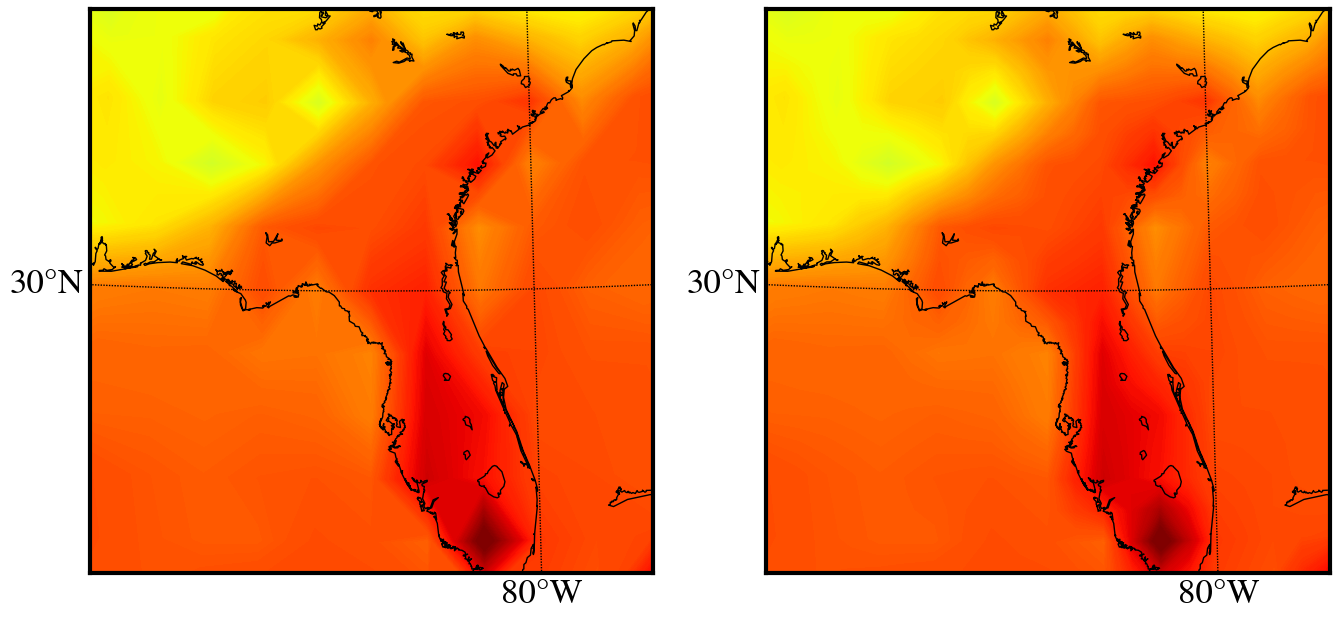

In [16]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

#original grid
lats, lons = test.latitude.data, test.longitude.data
m = Basemap(projection='lcc',lon_0=-83,lat_0=30,width=1e6,height=1e6,resolution='i')
xx, yy = m(lons, lats) #note to self, x=lons y=lats
cs = m.contourf(xx,yy,temp_data.data.to(units.fahrenheit),levels=np.linspace(-10,100,300),cmap=plt.cm.jet,extend='both',ax=axes[0])
m.drawcoastlines(ax=axes[0])
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25,ax=axes[0])
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25,ax=axes[0])
#axes[0].contourf(lons, lats, temp_data.to(units.fahrenheit), cmap=cm.jet,levels=np.linspace(-10,100,100), extend='both')

#new grid
lats, lons = new_dataset.latitude.data, new_dataset.longitude.data
m = Basemap(projection='lcc',lon_0=-83,lat_0=30,width=1e6,height=1e6,resolution='i')
xx, yy = m(lons, lats) #note to self, x=lons y=lats
temp_data = new_dataset.data * units(test.TMP.units)
cs = m.contourf(xx,yy,temp_data.to(units.fahrenheit),levels=np.linspace(-10,100,300),cmap=plt.cm.jet,extend='both',ax=axes[1])
m.drawcoastlines(ax=axes[1])
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25,ax=axes[1])
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25,ax=axes[1])

Is there a difference?

In [36]:
np.shape(new_dataset.data)

(361, 720)

In [37]:
np.shape(test.TMP.data)

(181, 360)

By eye from the plot I can't tell, but we can see the new dataset is a higher resolution (more grid points) than the original.

In [49]:
to_station_interp = test.TMP.grib2io.interp_to_stations('bilinear', ['KPHL'], [40], [-76])

In [50]:
to_station_interp

<xarray.DataArray 'TMP' (station: 1)>
array([271.1], dtype=float32)
Coordinates:
    refDate                   datetime64[ns] 2023-01-29T12:00:00
    leadTime                  timedelta64[ns] ...
    valueOfFirstFixedSurface  float64 ...
    perturbationNumber        int64 ...
    validDate                 datetime64[ns] ...
    longitude                 (station) int64 -76
    latitude                  (station) int64 40
  * station                   (station) <U4 'KPHL'
Attributes:
    GRIB2IO_section0:  [1196575042          0          0          2     165056]
    GRIB2IO_section1:  [   7    2    2    1    1 2023    1   29   12    0    ...
    GRIB2IO_section3:  [        0    259920         0         0         0    ...
    GRIB2IO_section4:  [  0   1   0   0   4   0 107   0   0   1  60   1   0  ...
    fullName:          Temperature
    shortName:         TMP
    units:             K

## let's play with the data

In [38]:
filters = dict(productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=1, leadTime = datetime.timedelta(hours=60))
test = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)

In [39]:
test

<xarray.Dataset>
Dimensions:                   (y: 361, x: 720)
Coordinates:
    refDate                   datetime64[ns] ...
    leadTime                  timedelta64[ns] ...
    valueOfFirstFixedSurface  float64 ...
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables: (12/24)
    4LFTX                     (y, x) float32 ...
    CAPE                      (y, x) float32 ...
    CIN                       (y, x) float32 ...
    CNWAT                     (y, x) float32 ...
    CPOFP                     (y, x) float32 ...
    FLDCP                     (y, x) float32 ...
    ...                        ...
    SNOD                      (y, x) float32 ...
    SUNSD                     (y, x) float32 ...
    TMP                       (y, x) float32 ...
    VIS                       (y, x) float32 ...
    WEASD                     (y, x) float32 ...
    WILT                      (y, x) float32 ...
Attributes:
    engine:   grib2io

In [40]:
[test[x].fullName for x in test.data_vars]

['Best (4 layer) Lifted Index',
 'Convective Available Potential Energy',
 'Convective Inhibition',
 'Plant Canopy Surface Water',
 'Percent frozen precipitation',
 'Field Capacity',
 'Frictional Velocity',
 'Wind Speed (Gust)',
 'Geopotential Height',
 'Haines Index',
 'Planetary Boundary Layer Height',
 'Ice Cover',
 'Ice Thickness',
 'Land Cover (0=sea, 1=land)',
 'Surface Lifted Index',
 'Potential Evaporation Rate',
 'Pressure',
 'Surface Roughness',
 'Snow Depth',
 'Sunshine Duration',
 'Temperature',
 'Visibility',
 'Water Equivalent of Accumulated Snow Depth',
 'Wilting Point']

In [41]:
temp = test.TMP.data * units(test.TMP.units)
wind = test.GUST * units(test.GUST.units)

In [42]:
wind

Magnitude,[[6.099999904632568 6.099999904632568 6.099999904632568 ... 6.099999904632568 6.099999904632568 6.099999904632568] [6.099999904632568 6.099999904632568 6.099999904632568 ... 6.099999904632568 6.099999904632568 6.099999904632568] [6.5 6.099999904632568 6.099999904632568 ... 6.400000095367432 6.400000095367432 6.5] ... [5.400000095367432 5.400000095367432 5.400000095367432 ... 5.5 5.5 5.5] [5.099999904632568 5.099999904632568 5.200000286102295 ... 5.099999904632568 5.099999904632568 5.099999904632568] [4.300000190734863 4.300000190734863 4.300000190734863 ... 4.300000190734863 4.300000190734863 4.300000190734863]]
Units,meter/second


In [43]:
import metpy.calc as mpcalc

t = mpcalc.windchill(temp.to(units.fahrenheit), wind, face_level_winds=True)

In [44]:
wind_chill = t

In [45]:
m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')
lons, lats = test.longitude.data, test.latitude.data
xx, yy = m(lons, lats) #note to self, x=lons y=lats

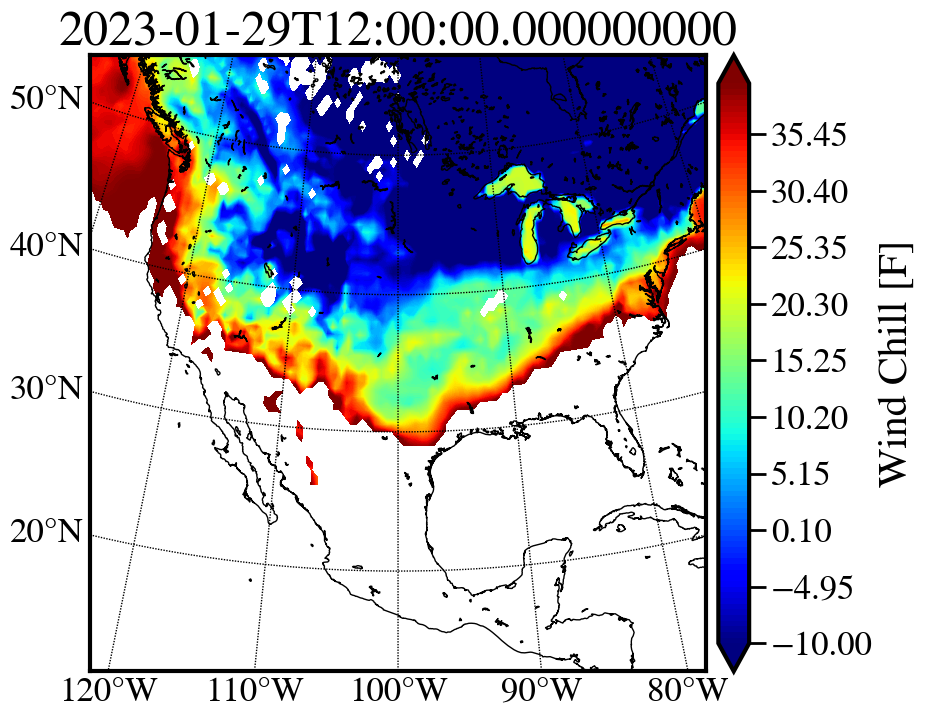

In [46]:
#norm = colors.Normalize(vmin=-10, vmax=100)
cs = m.contourf(xx,yy,wind_chill,levels=np.linspace(-10,40,100),cmap=plt.cm.jet, extend='both')

m.colorbar(location='right',label='Wind Chill [F]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(test.TMP.refDate.data
         )
plt.show()

## nimbl

While not integrated *just yet* I think the plan for the future workflow of the blend will be grib2io handling all of the I/O of the model and analysis files which will then feed into the computations done in nimbl. As such, nimbl has some great convenience functions to aid in the interpolation steps and to check that the input data has the correct units. 

In [4]:
filters = dict(productDefinitionTemplateNumber=0, typeOfFirstFixedSurface=1)
test = xr.open_dataset('/scratch2/STI/mdl-sti/Sidney.Lower/test_data/gdas.t12z.pgrb2.1p00.f007', engine='grib2io', filters=filters)

In [5]:
test

<xarray.Dataset>
Dimensions:                   (y: 181, x: 360)
Coordinates:
    refDate                   datetime64[ns] ...
    leadTime                  timedelta64[ns] ...
    valueOfFirstFixedSurface  float64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables: (12/33)
    4LFTX                     (y, x) float32 ...
    CAPE                      (y, x) float32 ...
    CFRZR                     (y, x) float32 ...
    CICEP                     (y, x) float32 ...
    CIN                       (y, x) float32 ...
    CNWAT                     (y, x) float32 ...
    ...                        ...
    SUNSD                     (y, x) float32 ...
    TMP                       (y, x) float32 ...
    VEG                       (y, x) float32 ...
    VIS                       (y, x) float32 ...
    WEASD                     (y, x) float32 ...
    WILT                      (y, x) float32 ...
Attributes:
    engine:   grib2io

So let's pretend we're dealing with a dataset that is at much different resolution than the NBM grid. The below grid is at 1 degree resolution == 100 km. But the NBM CONUS grid is at 2.5 km! So how can we interpolate to match?

In [6]:
test.grib2io.griddef()

Grib2GridDef(gdtn=0, gdt=array([        6,         0,         0,         0,         0,         0,
               0,       360,       181,         0,        -1,  90000000,
               0,        48, -90000000, 359000000,   1000000,   1000000,
               0]))

In [23]:
from nimbl import get_metadata

Use nimbl metadata! All of the possible models used in the blends are stored (at least their metadata) in nimbl's utils. So all we need to do is ask get_metadata to load in the grid info for the CONUS region at blend resolution.

In [24]:
get_metadata.get_metadata?

Signature:
get_metadata.get_metadata(
    report: Literal['all', 'ensembles', 'ensemble_location', 'grib2io_filters', 'leadTimes', 'reference_hours', 'grib2_grid', 'local_file', 'model_datasets', 'models', 'proj4_grid', 'regions', 's3_bucket', 'variables'],
    model: Optional[str] = None,
    model_dataset: Optional[str] = None,
    region: Optional[str] = None,
    reference_hour: Union[str, int, NoneType] = None,
    model_id: Optional[str] = None,
    variable: Optional[str] = None,
)
Docstring:
Return filtered model metadata.

Parameters
----------
report : str
    One of:

    all, ensembles, ensemble_location, grib2io_filters, leadTimes, reference_hours, grib2_grid, local_file, model_datasets, models, proj4_grid, regions, s3_bucket, variables

    Report type, by default "all".  If "all" returns a pandas DataFrame,
    otherwise returns a list of strings.  The following table shows the
    required keywords for each report type.

    +-------------------+-----------------+
    |

In [26]:
conus_grid = get_metadata.get_metadata('grib2_grid', model='blend', region='co')
conus_grid

[30,
 [1,
  0,
  6371200,
  255,
  255,
  255,
  255,
  2345,
  1597,
  19229000,
  233723400,
  48,
  25000000,
  265000000,
  2539703,
  2539703,
  0,
  80,
  25000000,
  25000000,
  -90000000,
  0]]

In [39]:
#then interp
from grib2io import Grib2GridDef
grid_def_out = Grib2GridDef(*conus_grid)
new_dataset = test.TMP.grib2io.interp('bicubic', grid_def_out)

Text(0.5, 1.0, 'CONUS Blend Grid')

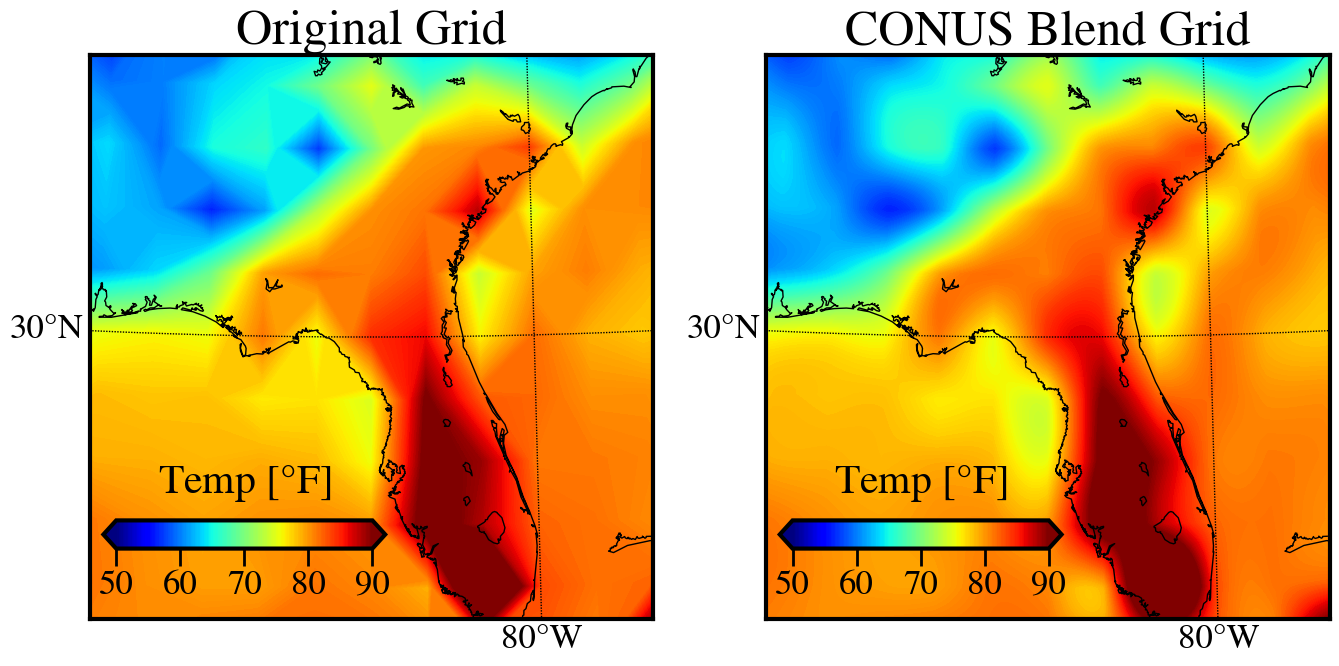

In [65]:
fig, axes = plt.subplots(1,2, figsize=(16,8))

temp_range = np.linspace(50,90,200)

#original grid
lats, lons = test.latitude.data, test.longitude.data
m = Basemap(projection='lcc',lon_0=-83,lat_0=30,width=1e6,height=1e6,resolution='i')
xx, yy = m(lons, lats) #note to self, x=lons y=lats
temp_data = test.TMP.data * units(test.TMP.units)
cs = m.contourf(xx,yy,temp_data.to(units.fahrenheit),levels=temp_range,cmap=plt.cm.jet,extend='both',ax=axes[0])
m.drawcoastlines(ax=axes[0])
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25,ax=axes[0])
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25,ax=axes[0])
#axes[0].contourf(lons, lats, temp_data.to(units.fahrenheit), cmap=cm.jet,levels=np.linspace(-10,100,100), extend='both')
cbar_ax = inset_axes(axes[0],
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',bbox_to_anchor=(0, 0.1, 1, 1),bbox_transform=axes[0].transAxes)

cbar=plt.colorbar(cs, cax=cbar_ax, orientation="horizontal",ticks=np.arange(50,100,10))
cbar.set_label('Temp [$\degree$F]',labelpad=-100)

#new grid
lats, lons = new_dataset.latitude.data, new_dataset.longitude.data
m = Basemap(projection='lcc',lon_0=-83,lat_0=30,width=1e6,height=1e6,resolution='i')
xx, yy = m(lons, lats) #note to self, x=lons y=lats
temp_data = new_dataset.data * units(test.TMP.units)
cs = m.contourf(xx,yy,temp_data.to(units.fahrenheit),levels=temp_range,cmap=plt.cm.jet,extend='both',ax=axes[1])
m.drawcoastlines(ax=axes[1])
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25,ax=axes[1])
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25,ax=axes[1])
cbar_ax = inset_axes(axes[1],
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',bbox_to_anchor=(0, 0.1, 1, 1),bbox_transform=axes[1].transAxes)

cbar=plt.colorbar(cs, cax=cbar_ax, orientation="horizontal",ticks=np.arange(50,100,10))
cbar.set_label('Temp [$\degree$F]',labelpad=-100)

axes[0].set_title('Original Grid')
axes[1].set_title('CONUS Blend Grid')

In [3]:
test = grib2io.open('/scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/pgrb2ap5/gep22.t12z.pgrb2a.0p50.f000')

In [4]:
test

mode = rb
name = /scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/pgrb2ap5/gep22.t12z.pgrb2a.0p50.f000
messages = 71
current_message = 0
size = 13858409
closed = False
variables = ('CAPE', 'CIN', 'HGT', 'ICETK', 'PRES', 'PRMSL', 'PWAT', 'RH', 'SNOD', 'SOILW', 'TMP', 'TSOIL', 'UGRD', 'VGRD', 'VVEL', 'WEASD')
levels = ('0-0.1 m underground', '10 m above ground', '10 mb', '100 mb', '1000 mb', '180-0 mb above ground', '2 m above ground', '200 mb', '250 mb', '300 mb', '400 mb', '50 mb', '500 mb', '700 mb', '850 mb', '925 mb', 'entire atmosphere (considered as a single layer)', 'mean sea level', 'surface')

In [7]:
test['TMP'][-1]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

In [10]:
test.TMP.metpy.quantify()

<xarray.DataArray 'TMP' (leadTime: 65, valueOfFirstFixedSurface: 3, y: 361,
                         x: 720)>
<Quantity([[[[241.18053 241.18053 241.18053 ... 241.18053 241.18053 241.18053]
   [241.21053 241.20052 241.20052 ... 241.23051 241.22052 241.22052]
   [241.54053 241.52052 241.51053 ... 241.56052 241.55052 241.54053]
   ...
   [241.56052 241.56052 241.56052 ... 241.57053 241.57053 241.57053]
   [241.17052 241.17052 241.17052 ... 241.18053 241.18053 241.17052]
   [241.03052 241.03052 241.03052 ... 241.03052 241.03052 241.03052]]

  [[240.28699 240.28699 240.28699 ... 240.28699 240.28699 240.28699]
   [240.687   240.58699 240.58699 ... 240.687   240.687   240.687  ]
   [241.187   241.187   241.187   ... 241.28699 241.28699 241.28699]
   ...
   [242.48698 242.48698 242.48698 ... 242.48698 242.48698 242.48698]
   [242.28699 242.28699 242.28699 ... 242.28699 242.28699 242.28699]
   [242.48698 242.48698 242.48698 ... 242.48698 242.48698 242.48698]]

  [[240.08287 240.08287 240.08287 ... 240.08287 240.08287 240.08287]
   [240.58287 240.58287 240.58287 ... 240.68286 240.68286 240.68286]
   [241.28287 241.28287 241.28287 ... 241.28287 241.28287 241.28287]
   ...
...
   ...
   [238.08142 238.08142 238.08142 ... 238.08142 238.08142 238.08142]
   [238.65141 238.65141 238.65141 ... 238.65141 238.65141 238.65141]
   [240.22142 240.22142 240.22142 ... 240.22142 240.22142 240.22142]]

  [[243.01128 243.01128 243.01128 ... 243.01128 243.01128 243.01128]
   [243.51128 243.51128 243.51128 ... 243.51128 243.51128 243.51128]
   [243.41129 243.41129 243.41129 ... 243.41129 243.41129 243.41129]
   ...
   [239.41129 239.41129 239.41129 ... 239.41129 239.41129 239.41129]
   [240.51128 240.51128 240.51128 ... 240.51128 240.51128 240.51128]
   [241.21129 241.21129 241.21129 ... 241.21129 241.21129 241.21129]]

  [[243.01128 243.01128 243.01128 ... 243.01128 243.01128 243.01128]
   [243.41129 243.41129 243.41129 ... 243.41129 243.41129 243.41129]
   [243.31128 243.31128 243.31128 ... 243.31128 243.31128 243.31128]
   ...
   [239.51128 239.51128 239.51128 ... 239.51128 239.51128 239.51128]
   [240.51128 240.51128 240.51128 ... 240.51128 240.51128 240.51128]
   [241.31128 241.31128 241.31128 ... 241.31128 241.31128 241.31128]]]], 'kelvin')>
Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes:
    GRIB2IO_section0:  [1196575042          0          0          2     246588]
    GRIB2IO_section1:  [   7    2    2    1    1 2023    1   29   12    0    ...
    GRIB2IO_section3:  [        0    259920         0         0         0    ...
    GRIB2IO_section4:  [  0   1   0   0   4   0 107   0   0   1   0 103   0  ...
    fullName:          Temperature
    shortName:         TMP